In [3]:
import functions as fu
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh

import sparse as sp

In [14]:
def compute_DeltaE(N, l_vals):

    DeltasE = []

    for l in l_vals:
        H = sp.ising_hamiltonian(N, l)

        # Compute ground state
        eigval, eigvec = eigsh(H, k=2, which='SA')

        first_eigval = eigval[0]
        second_eigval = eigval[1]

        delta = np.abs(first_eigval/N - second_eigval/N)

        DeltasE.append(delta)

    return DeltasE


N_vals = [8,9,10,11,12,13,14,15]
# l_vals = np.linspace(0, 20, 100)
l_vals = np.logspace(0.5, -0.4, 100)


DeltasE = []

for N in N_vals: 
    DeltaE = compute_DeltaE(N, l_vals)
    DeltasE.append(DeltaE)

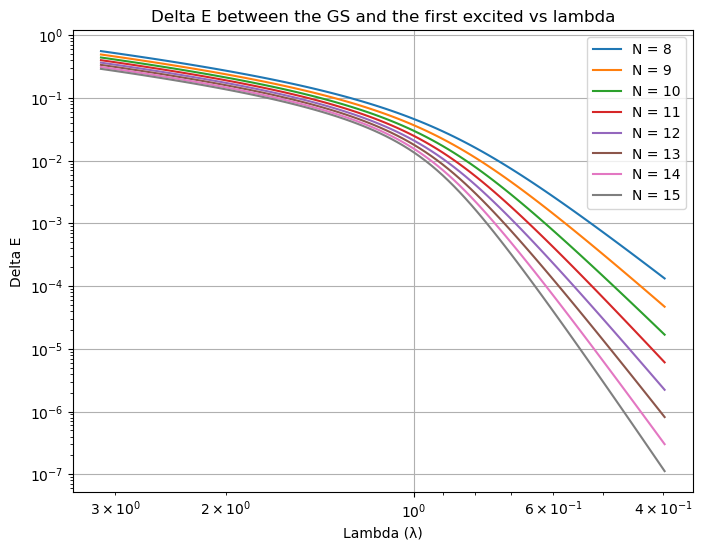

In [23]:
plt.figure(figsize=(8, 6))

for i,d in enumerate(DeltasE): 
    plt.plot(l_vals, d, label=f'N = {i+8}')


# plt.ylim(0,0.4)

plt.gca().invert_xaxis()
# plt.gca().invert_yaxis()
plt.xscale('log') 
plt.yscale('log') 

plt.xlabel('Lambda (λ)')
plt.ylabel('Delta E')
plt.title('Delta E between the GS and the first excited vs lambda')
plt.legend()
plt.grid(True)
plt.show()